In [115]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
n = 7624
e = 27806
p = 0.7

In [117]:
def dic2list(myDic):
    graph = []
    for i in myDic[0].keys():
        graph.append(i)
    return graph

def set2dic(sets):
    d = {}
    for k,v in sets:
        d[k] = v
    return d


In [118]:
def erdos():
    nodes = {}
    neighbor = {}
    while len(nodes) < e:
        r1 = np.random.randint(low=1,high=n+1)
        r2 = np.random.randint(low=1,high=n+1)
        if np.random.rand() >= p:
            nodes[tuple(sorted((r1,r2)))] = 1
            if  neighbor.get(r1,0) == 0:
                neighbor[r1] = []
            neighbor[r1].append(r2)

    return nodes,neighbor

In [119]:
def small_world( ):
    edges = set()
    nodes = {}
    neighbor = {}
    node_ids = list(range(e))
    k= 15
    # print(node_ids)

    for i in range(e):
        sources = [i] * k
        targets = node_ids[i + 1 : i + k ]
        edges.update(set(zip(sources, targets)))
    # print(len(edges))
    for ed in edges:
        if np.random.rand() >= p:
            # nodes.add(ed)
            nodes[tuple(sorted((ed[0],ed[1])))] = 1
            if  neighbor.get(ed[0],0) == 0:
                neighbor[ed[0]] = []
            neighbor[ed[0]].append(ed[1])

    return nodes,neighbor


In [120]:
def asia_lastfm():
    nodes = {}
    neighbor = {}
    df = pd.read_csv('lastfm_asia_edges.csv')
    for i in df.values:
        nodes[tuple(sorted((i[0],i[1])))] = 1
        if  neighbor.get(i[0],0) == 0:
            neighbor[i[0]] = []
        neighbor[i[0]].append(i[1])
    return nodes,neighbor

In [121]:
def get_neighbor(nodes,n1):
    nei = []
    for i in nodes.get(n1):
        for j in nodes.get(n1):
            if nodes.get(j) is  None:
                break
            if i in nodes.get(j)   :
                    nei.append(tuple(sorted((i,j))))
    return len([*set(nei)])

def get_degree(nodes,n1):
    return len(nodes.get(n1))

In [122]:
def clustering_coefficient(data, undirected=True):

    data = dic2list(data)
    def has_edge(n1, n2):
        neighbours = g.get(n1, [])
        if n2 in neighbours:
            return True
        neighbours = g.get(n2, [])
        if n2 in neighbours:
            return True
        return False

    def edges_to_dic(edges, undirected=True):
        res = {}
        for v1, v2 in edges:
            res.setdefault(v1, set())
            res[v1].add(v2)
            if undirected:
                res.setdefault(v2, set())
                res[v2].add(v1)
        return res

    if isinstance(data, list):
        g = edges_to_dic(data, undirected)
    else:
        g = data

    result = {}
    for node in g:
        neighbours = g[node]
        n_neighbors = len(neighbours)
        n_links = 0
        if n_neighbors > 1:
            for node1 in neighbours:
                for node2 in neighbours:
                    if has_edge(node1, node2):
                        n_links += 1
            n_links /= 2
            result[node] = 2 * n_links / (n_neighbors * (n_neighbors - 1))
        else:
            result[node] = 0
    return np.mean(list(result.values()))

In [123]:
def log_log(graph: dict, title ):
    score_board = {}
    for node in graph.keys():
        node_degree = len(graph[node])
        score_board[node_degree] = score_board.get(node_degree, 0) + 1

    x = []
    y = []

    for key in score_board.keys():
        x.append(key)
        y.append(score_board[key])

    x = np.array(x)
    y = np.array(y)

    x = np.log2(x)
    y = np.log2(y)

    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.scatter(x, y)
    plt.show()

    return x, y

In [124]:
print("Cluster coeffient erdos",clustering_coefficient(erdos()) )
print("Cluster coeffient small world",clustering_coefficient(small_world()))
print("Cluster coeffient asia",clustering_coefficient(asia_lastfm()))

Cluster coeffient erdos 0.0015690431109887585
Cluster coeffient small world 0.21694189739948075
Cluster coeffient asia 0.219418424327086


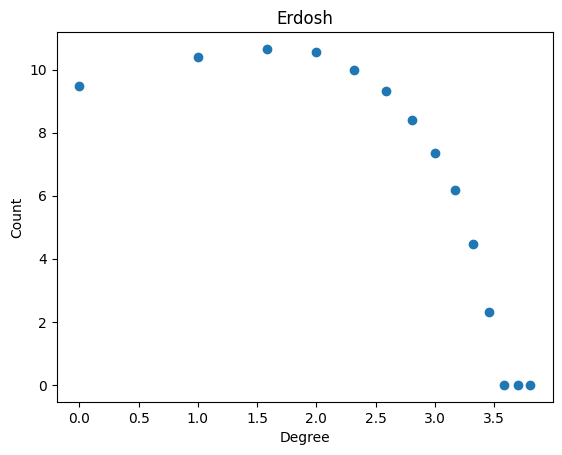

In [125]:
erosh_x, erdosh_y = log_log(erdos()[1], "Erdosh")

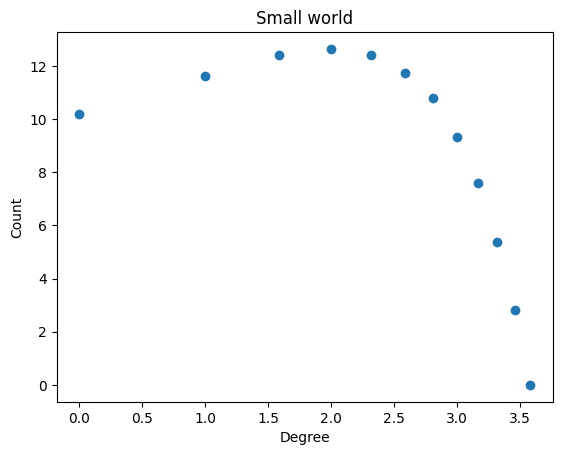

In [126]:
SW_x, SW_y = log_log(small_world()[1], "Small world")

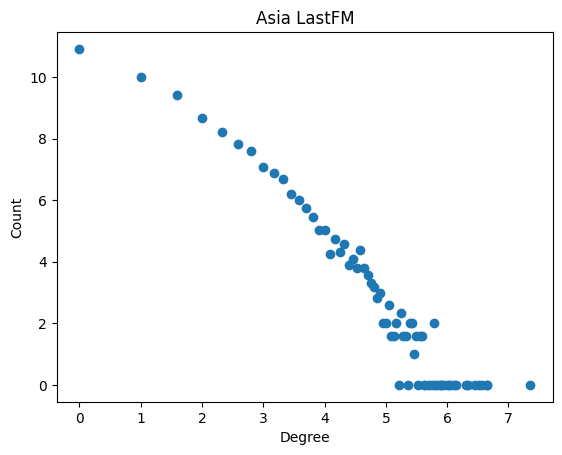

In [127]:
LF_x, LF_y = log_log(asia_lastfm()[1], "Asia LastFM")

In [128]:
def degree_distribuation_graph(graph , name):
    res = {}
    for node in graph.keys():
        res[len(graph[node])] = res.get(len(graph[node]), 0) + 1
    x, y = res.keys(), res.values()
    plt.title(f"degree distribution of {name}")
    plt.xlabel("degree")
    plt.scatter(x, y)
    plt.show()

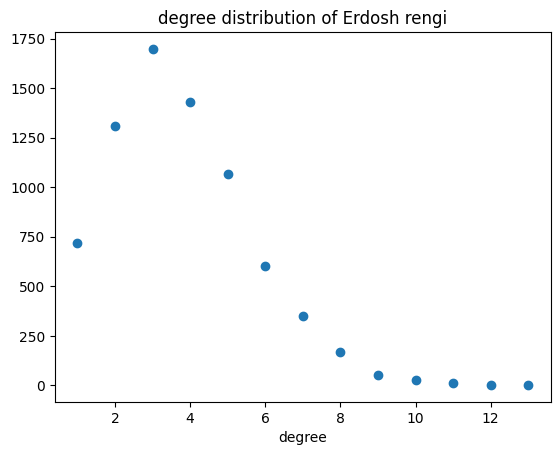

In [129]:
degree_distribuation_graph(erdos()[1], "Erdosh rengi")

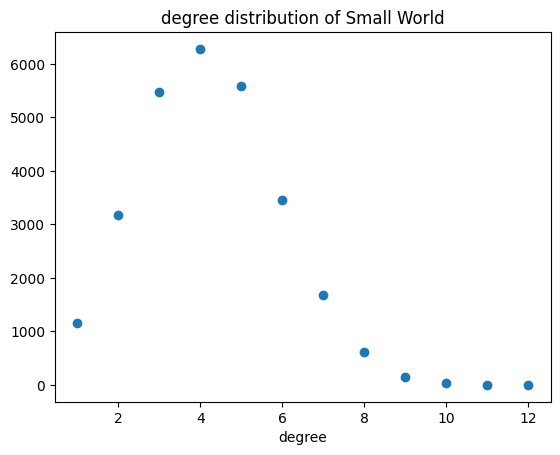

In [130]:
degree_distribuation_graph(small_world()[1], "Small World")

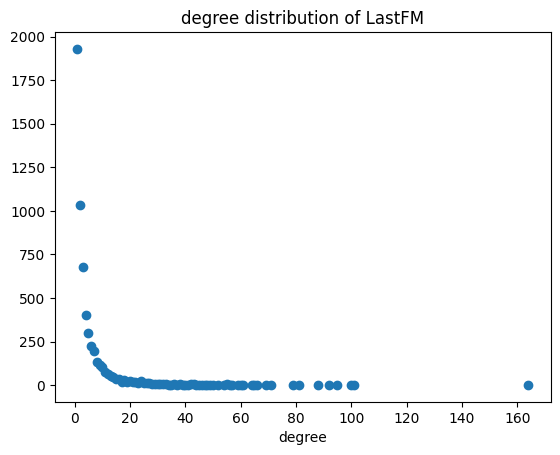

In [131]:
degree_distribuation_graph(asia_lastfm()[1], "LastFM")